In [23]:
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import os


load_dotenv()

True

In [24]:
owner = 'torvalds'
repo = 'linux'
token = os.getenv('github_token')


In [25]:
url_to_get_prs_number = f'https://api.github.com/repos/{owner}/{repo}/pulls?q=mergeable:conflicting'
headers = {'Authorization': f'token {token}'}
response = requests.get(url_to_get_prs_number, headers=headers)
prs = response.json()
pr_with_comments = []

for pr_number in prs:
    url_to_get_pr_comments = f'https://api.github.com/repos/{owner}/{repo}/pulls/{pr_number["number"]}/comments'
    response = requests.get(url_to_get_pr_comments, headers=headers)
    pr_comments = response.json()
    
    if pr_comments: 
        pr_with_comments.append(pr_number["number"])

for index, pr_number in enumerate(pr_with_comments):
    print(index, pr_number)



[{'url': 'https://api.github.com/repos/torvalds/linux/pulls/805', 'id': 382351562, 'node_id': 'MDExOlB1bGxSZXF1ZXN0MzgyMzUxNTYy', 'html_url': 'https://github.com/torvalds/linux/pull/805', 'diff_url': 'https://github.com/torvalds/linux/pull/805.diff', 'patch_url': 'https://github.com/torvalds/linux/pull/805.patch', 'issue_url': 'https://api.github.com/repos/torvalds/linux/issues/805', 'number': 805, 'state': 'open', 'locked': False, 'title': 'Fix for packets being rejected in the ring buffer used by the xHCI co…', 'user': {'login': 'TarAldarion', 'id': 1926903, 'node_id': 'MDQ6VXNlcjE5MjY5MDM=', 'avatar_url': 'https://avatars.githubusercontent.com/u/1926903?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/TarAldarion', 'html_url': 'https://github.com/TarAldarion', 'followers_url': 'https://api.github.com/users/TarAldarion/followers', 'following_url': 'https://api.github.com/users/TarAldarion/following{/other_user}', 'gists_url': 'https://api.github.com/users/TarAldarion/gis

COMMENTS WITH STOPWORDS REMOVED

In [26]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner}/{repo}/pulls/{pr_with_comments[0]}/comments'

headers = {'Authorization': f'token {token}'}

response = requests.get(url_to_get_pr_comments, headers=headers)

prs = response.json()

bodies = [comment['body'] for comment in prs]

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_comments = []
cleaned_bodies = []

for body in bodies:
    cleaned_words = [word for word in word_tokenize(body) if word.lower() not in stop_words]
    cleaned_comment = ' '.join(cleaned_words)  
    cleaned_bodies.append(cleaned_comment)  
    all_comments.extend(cleaned_words)

print(cleaned_bodies)

IndexError: list index out of range

COMMENTS WITHOUT STOPWORDS REMOVED

In [ ]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner}/{repo}/pulls/{pr_with_comments[0]}/comments'

headers = {'Authorization': f'token {token}'}

response = requests.get(url_to_get_pr_comments, headers=headers)

prs = response.json()

bodies = [comment['body'] for comment in prs]

print(bodies)

['Useless space', 'Will fix it', 'Left one space for decor ', "> cuming\r\n\r\nYeah, i'd doubt they'll put Christmas stuff in Linux."]


In [ ]:
url_to_get_pr_comments = f'https://api.github.com/repos/{owner}/{repo}/pulls/{pr_with_comments[0]}/comments'

headers = {'Authorization': f'token {token}'}


response = requests.get(url_to_get_pr_comments, headers=None)

prs = response.json()

pr_comments = [pr_comment['body'] for pr_comment in prs]

total_neutral = 0
total_positive = 0
total_negative = 0
total_compound = 0

for pr_comment in pr_comments:
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(pr_comment)
    sentiment_neutral = sentiment['neu']
    sentiment_positive = sentiment['pos']
    sentiment_negative = sentiment['neg']
    sentiment_compound = sentiment['compound']
    total_neutral += sentiment_neutral
    total_positive += sentiment_positive
    total_negative += sentiment_negative
    total_compound += sentiment_compound
    print('Comment -> ', pr_comment)
    print('Sentiment -> ', sentiment)
    print('-----------------------')

Comment ->  Useless space
Sentiment ->  {'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'compound': -0.4215}
-----------------------
Comment ->  Will fix it
Sentiment ->  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
-----------------------
Comment ->  Left one space for decor 
Sentiment ->  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
-----------------------
Comment ->  > cuming

Yeah, i'd doubt they'll put Christmas stuff in Linux.
Sentiment ->  {'neg': 0.197, 'neu': 0.63, 'pos': 0.173, 'compound': -0.0772}
-----------------------


Total Neutral ->  2.893
Total Positive ->  0.173
Total Negative ->  0.9339999999999999
Total Compound ->  -0.4987


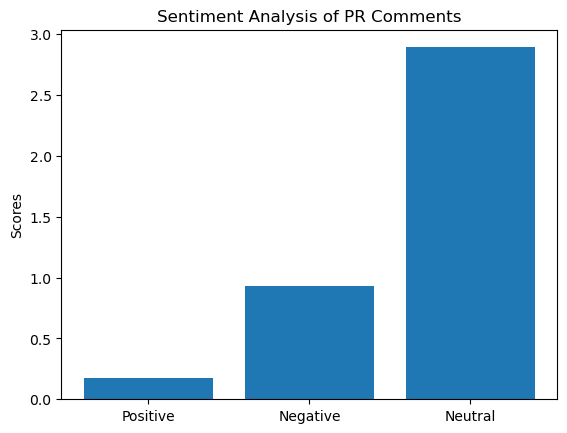

In [ ]:
print('Total Neutral -> ', total_neutral)
print('Total Positive -> ', total_positive)
print('Total Negative -> ', total_negative)
print('Total Compound -> ', total_compound)

labels = ['Positive', 'Negative', 'Neutral']	
scores = [total_positive, total_negative, total_neutral]	

plt.bar(labels, scores)
plt.ylabel('Scores')
plt.title('Sentiment Analysis of PR Comments')
plt.show()